<!--# STAT 207: Data Science Exploration-->

# <u>Case Study 8 Notebook</u>: Introduction to Inference – Hypothesis Testing for Population Means (µ) and Population Proportions (p)

This Case Study contains analyses to answer two questions from Pew Survey data:

- Is there sufficient evidence to suggest that the average age of an adult living in the U.S (in 2017) is NOT equal to 50?
- Is there sufficient evidence to suggest that the proportion of adults living in the U.S. that approve of the way things are going in the country (in 2017) is NOT equal to 0.75?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Preliminary Dataset Cleaning and Inspection

The February 2017 Pew Research Center random phone number dialing survey had 1,503 respondents in total.  We'll be focusing on the age variable for this analysis.

First, let's learn a little more about this dataset.

In [2]:
# Read in the data
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df_pew = pd.read_csv('Feb17public.csv', 
                   na_values=missing_values)
df_pew.head()

,psraid,sample,int_date,fcall,version,attempts,refusal,ilang,cregion,state,...,ql1a,qc1,money2,money3,iphoneuse,hphoneuse,ll,cp,cellweight,weight
0,100008,Landline,21017,170207,Client changes,4,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.733333
1,100019,Landline,21217,170207,Client changes,4,Yes,English,South,North Carolina,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.500000
2,100020,Landline,21217,170207,Client changes,4,Yes,English,Northeast,New York,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.533333
3,100021,Landline,20717,170207,Initial version,1,No,English,Midwest,Minnesota,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,5.866667
4,100024,Landline,20717,170207,Initial version,1,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.700000


What is the shape of this dataset?

In [3]:
df_pew.shape

(1503, 130)

Let's create a pandas series that is just the the age column of this dataframe and drop the missing values from this series.

In [4]:
df_pew_age=df_pew['age'].dropna()
df_pew_age

0       80.0
1       70.0
2       69.0
3       50.0
4       70.0
        ... 
1498    37.0
1499    30.0
1500    72.0
1501    67.0
1502    35.0
Name: age, Length: 1489, dtype: float64

What is the shape of this series?

In [5]:
df_pew_age.shape

(1489,)

## Collecting Sample Information

In [6]:
# compute and display sample statistics
sample_mean_age = df_pew_age.mean()
sample_std_age = df_pew_age.std()
n_age = df_pew_age.shape[0]
print('sample mean age =', round(sample_mean_age, 2), 
      'sample std age =', round(sample_std_age,2), 
      'sample size n =', n_age)

pop_std_age=18

print('population standard deviation age=',pop_std_age) 

sample mean age = 50.49 sample std age = 17.84 sample size n = 1489
population standard deviation age= 18


Above, we calculated some statistics based on our given sample.  Below, we consider the shape of the distribution based on our sample.

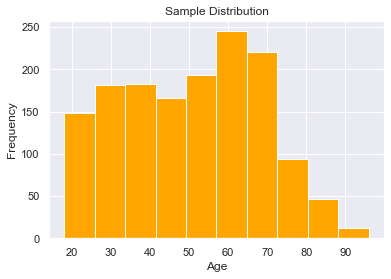

In [7]:
df_pew_age.hist(color='orange')
plt.title('Sample Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Frequentist Hypothesis Testing for a Population Mean $\mu$ - Using p-values

**Has the average age of all adults living in the U.S. changed from 2007 to 2017?**

For example, suppose that in 2007 the average age of all adults living in the U.S. was thought to have been 50. In 2017, researchers are skeptical that that is still the case. We would like to conduct hypothesis testing to test these claims. 
So in 2017, we collect a random sample of size 1489 with an average of 50.49 years and a standard deviation of 17.84 years. Suppose we also know that the standard deviation of ALL adults living in the U.S. in 2017 is σ=18.

### Set up your hypotheses for this test.

$H_0: \mu=50$.

$H_A: \mu\neq 50$.

Where $\mu=$ the mean age of ALL adults living in the U.S. in 2017.

For this example, we will use a significance level of $\alpha = 0.05$.


### Assumptions: Are the Central Limit Theorem Conditions (for Sample Means) met by this example?

Yes, the Central Limit Theorem Conditions (for Sample Means) below are met by this sample.

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: Either n>30 OR the population distribution is normal.</u>.
    - It looks like the population distribution of ages is NOT normal. How do we know?
        - The sample distribution and the population distribution tend to mirror each other.
        - The sample distribution above is NOT symmetric and unimodal, therefore, it is not a good assumption to say that it is normal.
    - However, because our sample size $n=1489>30$,this condition is met.

### Calculating the p-value

**<u>Method 1</u>: Using the sampling distribution of sample means**

We know this sampling distribution is a normal distribution with:
* $mean = \mu_0=50$ (because we are assuming the null hypothesis $H_0: \mu=50$)
* $standard \_deviation = \frac{\sigma}{\sqrt{n}}=\frac{18}{\sqrt{1489}}$.

We know this sampling distribution is normal, because the Central Limit Theorem for Sample Means conditions are met.

In [8]:
from scipy.stats import norm

assumed_pop_mean=50
std_error=pop_std_age/np.sqrt(n_age)

pvalue=2*(1-norm.cdf(50.49, loc=assumed_pop_mean, scale=std_error))
print('p-value:',pvalue)

p-value: 0.29351622690913737


**<u>Method 2</u>: Using the distribution of the z-scores of the sample means in the sampling distribution.**

We know that this distribution is the standard normal distribution because the sampling distribution is normal, and the distribution of z-scores of observations from a normal distribution is always the standard normal distribution.


In [9]:
test_statistic=(50.49-assumed_pop_mean)/std_error
test_statistic

1.0504392085524068

In [10]:
pvalue=2*(1-norm.cdf(np.abs(test_statistic), loc=0, scale=1))
print('p-value:',pvalue)

p-value: 0.29351622690913737


### Using a significance level of α=0.05, make a conclusion about your hypotheses.

Because $p-value = 0.29 \geq \alpha =0.05$, we **fail to reject the null hypothesis.** Thus, we say that we **DON'T HAVE sufficient evidence to suggest the alternative hypothesis** (that average age of ALL adults in the U.S. is different from 50.).

### Complication 1: What do you do if you don't know $\sigma$?

In this situation, we can make adjustments similar to what we saw for confidence intervals.  We can plug in our best estimate for $\sigma$ from our sample, $s$.  We then also need to make appropriate distributional assumptions, using the $t(df = n-1)$ reference distribution in place of the Normal distribution.

In [11]:
from scipy.stats import t

est_st_err = sample_std_age / np.sqrt(n_age)
t_stat = (sample_mean_age - 50) / est_st_err

pvalue=2*(1-t.cdf(t_stat, df = n_age - 1))
print('estimated standard error:',est_st_err)
print('t test statistic:',t_stat)
print('p-value:',pvalue)

estimated standard error: 0.4624280299786232
t test statistic: 1.0558338034957857
p-value: 0.29121554367401137


### Complication 2: What do you do if your assumptions aren't met?  (And sometimes even if they are)

We can calculate our p-values using simulations without relying on a reference distribution.

**<u>p-value calculation with Method 3</u>:  Approximate the p-value using a simulated sampling distribution.**

What if we don't want to use the normal distribution approximation, or what if we can't assume that the normal distribution is valid as the distribution for the sample mean?  

We previously saw how to approximate a sampling distribution for a sample mean based on some set of data.  Since our sample is our best available approximation of the population, we can let the sample serve as a population.  Then, we can perform the process needed to generate a sampling distribution from our sample.  Since this is based on a sample, we call this a **bootstrapped** sampling distribution.  In this case, our sampling distribution will display the test statistic (t) for each of our **bootstrapped** samples.

Once we have our reference **bootstrapped** distribution, we can find the probability of observing a test statistic as extreme or more extreme than what we observed.  To do this, we will center our bootstrapped distribution by our assumed (hypothesized, under the null hypothesis) mean.

**Note:** this approach does not rely on any distributional assumptions for the sample mean, which makes it especially helpful if the conditions for the Central Limit Theorem (and required for Methods 1 & 2 above) are not met.

**Note 2:** this approach relies on having a reliable sample.  If our sample is not a good sample, we will not be able to calculate a reasonable p-value.  *Garbage in, garbage out.*

In [12]:
def MCstats(df, x='', replace=True, n=1, M=1, samp_mean = 0):
    #INPUT:
    # df is a data frame
    # x is a text-valued name for a variable in the data frame
    # replace = True or False depending on whether 
    #    draws are with or without replacement
    # n = number of draws per sample
    # M = number of samples to draw
    MCtstats = []
    for i in range(M):
        #1. Collect a random sample of size n with replacement
        #2. Calculate the t-test statistic of this random sample
        #3. Append this random t-stat to the TestStats list 
        # (which is our BOOTSTRAPPED SAMPLING DISTRIBUTION OF TEST STATS!)
        mysample = df[x].sample(n, replace = replace)
        xbar = mysample.mean()
        s = mysample.std()
        tstat = (xbar - samp_mean) / (s / np.sqrt(n))
        MCtstats.append(tstat)
    #4. returns the sampling distribution in a dataframe format
    return pd.DataFrame({x: MCtstats})

In [13]:
df_age = pd.DataFrame({'x': df_pew_age})
samp_dist = MCstats(df_age, x = 'x', n = n_age, M = 10000, 
                    samp_mean = sample_mean_age)

In [14]:
# observed test statistic
(sample_mean_age - assumed_pop_mean) / (sample_std_age / np.sqrt(n_age))

1.0558338034957857

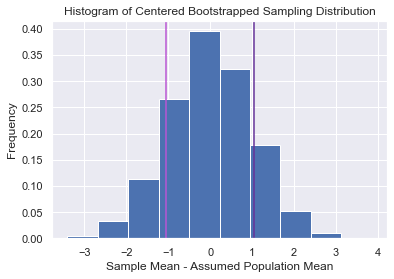

In [15]:
# bootstrapped distribution
samp_dist['x'].hist(density = True)
plt.xlabel('Sample Mean - Assumed Population Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Centered Bootstrapped Sampling Distribution')
plt.axvline(1.0558, color = 'rebeccapurple')
plt.axvline(-1.0558, color = 'mediumorchid')
plt.show()

In [16]:
# pvalue approximation
((samp_dist['x'] >= 1.0558) + (samp_dist['x'] <= -1.0558)).mean()

0.2943

## Frequentist Hypothesis Testing: for a Population Mean µ - Using a Confidence Interval

For example, suppose that in 2007 the average age of all adults living in the U.S. was thought to have been 50. In 2017, researchers are skeptical that that is still the case. We would like to conduct hypothesis testing to test these claims. 
So in 2017, we collect a random sample of size 1489 with an average of 50.49 years and a standard deviation of 17.84 years. Suppose we don’t know the standard deviation of ALL adults living in the U.S. 
**Conduct your hypothesis test using a <u>95% confidence interval</u>.**

### Set up hypotheses

$H_0: \mu=50$.

$H_A: \mu\neq 50$.

Where $\mu=$ the mean age of ALL adults living in the U.S. in 2017.

**Note**: when using a confidence interval, the simplest case is when we have an alternative hypothesis with a does not equal, $\neq$ sign.  There are additional steps to consider for other versions of an alternative hypothesis.


### Check Central Limit Theorem Conditions (for Sample Means)

Yes, the Central Limit Theorem Conditions (for Sample Means) below are met by this sample. **THUS WE CAN PROCEED WITH CONDUCTING THIS HYPOTHESIS TEST.**

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: Either n>30 OR the population distribution is normal.</u>.
    - It looks like the population distribution of ages is NOT normal. How do we know?
        - The sample distribution and the population distribution tend to mirror each other.
        - The sample distribution above is NOT symmetric and unimodal, therefore, it is not a good assumption to say that it is normal.
    - However, because our sample size $n=1489>30$,this condition is met.

### Create a 95% Confidence Interval:

In [17]:
alpha = 0.05
critical_value=norm.ppf(1-alpha/2)
#Equivalent to...
#critical_value=norm.ppf(0.975)

print('Critical Value: ',critical_value)

Critical Value:  1.959963984540054



$(\bar{x} - z^*\frac{\sigma}{\sqrt{n}},\bar{x} + z^*\frac{\sigma}{\sqrt{n}})$

$(50.49 - (1.96)\frac{17.84}{\sqrt{1489}},50.49  + (1.96)\frac{17.84}{\sqrt{1489}})$

$(49.58,51.39)$.

In [18]:
lower_bound=sample_mean_age-critical_value*(sample_std_age/np.sqrt(n_age))
upper_bound=sample_mean_age+critical_value*(sample_std_age/np.sqrt(n_age))

print(lower_bound,',',upper_bound)

49.581904861535484 , 51.3945894299353


### Make a Decision:

Because the null value $\mu_0=50$ is **inside** the confidence interval we **fail to reject the null hypothesis.** Thus, we say that we **DON'T HAVE sufficient evidence to suggest the alternative hypothesis** (that average age of ALL adults in the U.S. is different from 50.).

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Frequentist Hypothesis Testing for a Population Proportion p - Using p-values

For example, suppose that a politician claims that 75% of all adults living in the U.S. (in 2017) are satisfied with the way things are going in the country. A team of researchers is skeptical of this claim and would like to test it. They collect a random sample of size n=1435 that has a sample proportion of 0.301 that approve.

### Dataset Cleaning and Inspection

We wil be using the same 2017 Pew dataset as in the previous case study. The 'q2' column contains responses to the following question: 'All in all, are you satisfied or dissatisfied with the way things are going in this country today?'

Let's create a pandas series that is just the the q2 column of this dataframe and drop the missing values from this series.

In [19]:
df_pew_q2=df_pew['q2'].dropna()
df_pew_q2

0       Dissatisfied
1       Dissatisfied
2       Dissatisfied
3          Satisfied
4       Dissatisfied
            ...     
1498       Satisfied
1499    Dissatisfied
1500    Dissatisfied
1501    Dissatisfied
1502       Satisfied
Name: q2, Length: 1435, dtype: object

In [20]:
df_pew_q2.shape

(1435,)

### Collecting Sample Information

In [21]:
q2sum=df_pew_q2.value_counts()
q2sum

Dissatisfied    1003
Satisfied        432
Name: q2, dtype: int64

Sample Proportion that are Satisfied: $\hat{p}=0.301$.

In [22]:
prop = q2sum['Satisfied']/q2sum.sum()
round(prop, 4)

0.301

Sample Size n=1435

In [23]:
n_prop=df_pew_q2.shape[0]
n_prop

1435

### Set up your hypotheses for this test

$H_0: p=0.75$

$H_A: p\neq0.75$

p=the proportion of all adults in the U.S. (in 2017) that approve of the way that the country is going



### Are the Central Limit Theorem Conditions (for Sample Proportions) met by this sample? 

Yes, the Central Limit Theorem Conditions (for Sample Proportions) below are met by this sample.

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: $np\geq 10$ and $n(1-p)\geq 10$.</u>.
    - Because we don't know $p$, we plug in $p_0=0.75$ in for $p$ in the conditions above.
    - $np_0 = 1435\cdot 0.75\geq 10$
    - $n(1-p_0)=1435\cdot(1-0.75)\geq 10$.

### Calculating the p-value

**<u>Method 1</u>: Using the sampling distribution of sample proportions**

In [24]:
dist_samp_prop_is_from_null_value=.75-0.301
dist_samp_prop_is_from_null_value

0.449

In [25]:
assumed_pop_prop=0.75

assumed_pop_prop+dist_samp_prop_is_from_null_value

1.199

In [26]:
from scipy.stats import norm

assumed_pop_prop=0.75
print('Assumed Population Proportion (ie. null value):', assumed_pop_prop)

std_error=np.sqrt(assumed_pop_prop*(1-assumed_pop_prop)/n_prop)
print('Standard Error:', std_error)

pvalue=2*(norm.cdf(0.301, loc=assumed_pop_prop, scale=std_error))
print('p-value:',pvalue)

Assumed Population Proportion (ie. null value): 0.75
Standard Error: 0.011430748921480313
p-value: 0.0


###  Use a significance level of α=0.10, make a conclusion about your hypotheses.

Because $p-value \approx 0 < \alpha =0.10$, we **reject the null hypothesis.** Thus, we say that we **HAVE sufficient evidence to suggest the alternative hypothesis** (that proportion of ALL adults living in the U.S. that approve of the way the country is going is DIFFERENT from 0.75).

### What do you do when you need to plug in a 'p' in the conditions and the standard error, but you don't know p?

You might think that we'd do something similar to hypothesis tests for means -- plug in our best guess of $p$.

But, in this case, there is one condition that is more important than plugging in our best estimate.  Consider the null hypothesis.  We are performing our hypothesis testing under the assumption that the null hypothesis is true, so we will use our hypothesized value of p in the standard error formula.

## Frequentist Hypothesis Testing: for a Population Mean p - Using a Confidence Interval - Testing Claim: $p\neq p_0$

For example, suppose that a politician claims that 75% of all adults living in the U.S. (in 2017) are satisfied with the way things are going in the country. A team of researchers is skeptical of this claim and would like to test it. They collect a random sample of size n=1435 that has a sample proportion of 0.301 that approve. **Evaluate these hypotheses by using a <u>90% confidence interval</u>.**

### Set up Hypotheses

$H_0: p=0.75$

$H_A: p\neq0.75$

### Check the Central Limit Theorem Conditions (for Sample Proportions)
The Central Limit Theorem Conditions (for Sample Proportions) below are met by this sample.

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
2. <u>Condition: $np\geq 10$ and $n(1-p)\geq 10$.</u>.
    - Because we don't know $p$, we plug in $p_0=0.75$ in for $p$ in the conditions above.
    - $np_0 = 1435\cdot 0.75\geq 10$
    - $n(1-p_0)=1435\cdot(1-0.75)\geq 10$.
    

    

### Find the Critical Value for This Confidence Interval

Find the POSITIVE z-score $z^*$ in the standard normal distribution in which:
* an area of 0.90 is in between $-z^*$ and $z^*$.

Put another way: We want to find the POSITIVE z-score $z^*$ in the standard normal distribution in which:
* an area of 0.95=0.05+0.90 is to the left of $z^*$ and 
* an area of 0.05 is to the right of $z^*$. 

We can find the x-axis value (ie. the z-score) that has a left tail area of 0.95 by using the **norm.ppf()** function.

In [27]:
from scipy.stats import norm
#critical_value=norm.ppf(0.95)
alpha=0.10
critical_value=norm.ppf(1-alpha/2)
print('Critical Value:',critical_value)

Critical Value: 1.6448536269514722


### Calculate the 90% Confidence Interval for p

$(\hat{p} - z^*\sqrt{\frac{p(1-p)}{n}},\hat{p} - z^*\sqrt{\frac{p(1-p)}{n}})$

$\approx (\hat{p} - z^*\sqrt{\frac{p_0(1-p_0)}{n}},\hat{p} - z^*\sqrt{\frac{p_0(1-p_0)}{n}})$

$(0.301 - 1.645\sqrt{\frac{0.75(1-0.75)}{1435}},0.301 + 1.645\sqrt{\frac{0.75(1-0.75)}{1435}})$

$(0.282,0.320)$.

In [28]:
lower_bound=prop-critical_value*np.sqrt(assumed_pop_prop*(1-assumed_pop_prop)/n_prop)
upper_bound=prop+critical_value*np.sqrt(assumed_pop_prop*(1-assumed_pop_prop)/n_prop)

print(lower_bound,',',upper_bound)

0.2822433873449789 , 0.3198472049895159


### Make a Decision:
Because the null value $p_0=0.75$ is **not in the confidence interval**, we **reject the null hypothesis.** Thus, we say that we **HAVE sufficient evidence to suggest the alternative hypothesis** (that proportion of ALL adults living in the U.S. that approve of the way the country is going is DIFFERENT from 0.75).

---
STAT 207, Julie Deeke, Victoria Ellison, and Douglas Simpson, University of Illinois at Urbana-Champaign